In [2]:
import pandas as pd 

import seaborn as sns

import numpy as np 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy import stats 
from scipy.stats import norm    

from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import csv

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataFrame = pd.read_csv('KS_train_data.csv')

In [4]:
print(dataFrame.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [5]:
dataFrame.head(10)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.00,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.00,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,1332991739,MyPhoneHenge,5217.00,False,5217.00,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,1332991696,Walk-Through,7160.00,False,7160.00,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.00,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.0,...,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.00,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.0,...,1333045464,A Book of Dwarves,5429.95,False,5429.95,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.0,...,1332822807,Drawing a Drawing 365,62736.01,True,62736.01,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.0,...,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.00,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.0,...,1332851088,Arts on the Waterfront,5001.00,False,5001.00,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...


***
```
COL's VARS:

1)project_id
2)backers_count : number of supporters of the project (quantitative)
3)blurb : description of the project (qualitative)
4)category (qualitative)
5)converted_pledged_amount : funding amount ?? (quantitative). It's into integers
6)country (qualitative)
7)created_at (quantitative)
8)currency (qualitative)
9)deadline (quanatitative)
10)fx_rate : exchange rate (quantitative)
11)goal : goal of expected fundings (quantitative)
12)launched_at: (quantitative)
13)name : name of the project (qualitative)
14)pledged : funding amount ?? (quantitative). It's into floats (.00)
15)staff_pick : projects picked or not picked (Boolean -> True/False)
16)usd_pledged : funding amount in dollars ?? (quantitative). It's into floats (.00) != pledged
17)location: City, State(abbreviation)/Country 
18)funded : projects funded or not funded (Boolean -> True/False) --> MOST IMPORTANT
19)subcategory (qualitative)
20)project_url (link)
21)reward_url (link)

```
***

In [6]:
dataFrame['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

***
```
Most projects have been funded (58454) compared to (41546) not funded

```
***

# Data Cleaning

In [7]:
dataFrame['deadline']= pd.to_datetime(dataFrame['deadline'],origin='unix',unit='s')
dataFrame['created_at']= pd.to_datetime(dataFrame['created_at'],origin='unix',unit='s')
dataFrame['launched_at']= pd.to_datetime(dataFrame['launched_at'],origin='unix',unit='s')
dataFrame['deadline'].head()

0   2012-04-19 20:16:00
1   2012-05-08 01:22:25
2   2012-05-28 03:28:59
3   2012-04-19 03:28:16
4   2012-04-28 03:37:20
Name: deadline, dtype: datetime64[ns]

In [8]:
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [project_id, backers_count, blurb, category, converted_pledged_amount, country, created_at, currency, deadline, fx_rate, goal, launched_at, name, pledged, staff_pick, usd_pledged, location, funded, subcategory, project_url, reward_url]
Index: []

[0 rows x 21 columns]


There are no duplicate rows.

In [9]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

In [10]:
dataFrame = dataFrame.dropna(how='any',axis=0)

In [11]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

We removed all the rows with null v alues

Find the lenght of the blurb(description) of each project

In [12]:
dataFrame['blurb_lenght'] = dataFrame['blurb'].str.len()

Find the goal amount in USD using the fx_rate

In [13]:
dataFrame['goal_usd'] = (dataFrame['goal'] * dataFrame['fx_rate'])

# Data Analysis

Number of prjects that were founded and not

<AxesSubplot:>

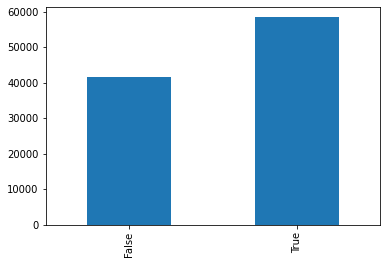

In [14]:
dataFrame['funded'].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:ylabel='category'>

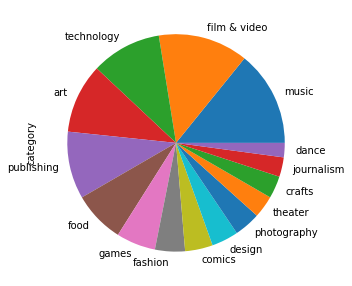

In [15]:
(dataFrame['category'].value_counts()/len(dataFrame)).plot.pie(y='mass', figsize=(5, 5))

In [16]:
dataFrame['country'].value_counts()

US    76715
GB     8015
CA     3511
AU     1793
DE      968
      ...  
GM        1
NE        1
PY        1
TJ        1
VU        1
Name: country, Length: 174, dtype: int64

Check if all the values of the most relevant columns are consistent with each other

In [17]:
np.issubdtype(dataFrame['goal'].dtype, np.number)

True

In [18]:
np.issubdtype(dataFrame['staff_pick'].dtype, np.bool)

True

In [19]:
np.issubdtype(dataFrame['funded'].dtype, np.bool)

True

There are no typos

In [20]:
dataFrame['proj_time_days_duration'] = (dataFrame.deadline - dataFrame.launched_at)
dataFrame['proj_time_days_duration'] = dataFrame['proj_time_days_duration'].dt.days
dataFrame['proj_time_days_duration'].head()

0    21
1    40
2    60
3    21
4    30
Name: proj_time_days_duration, dtype: int64

 Caps outliers to closest existing value within threshold (IQR).
 Identifying the upper bound for most relevant quantitative variables, and dropping the outliers accordingly

In [21]:
def cap_outliers(series, iqr_threshold=1.5, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

In [22]:
cap_outliers(dataFrame['goal'], verbose=True)
converted_pledged_amount_to_drop_upper_bound = dataFrame.index[dataFrame.goal > 27750]
converted_pledged_amount_to_drop_lower_bound = dataFrame.index[dataFrame.goal < -14250]
dataFrame.drop(converted_pledged_amount_to_drop_lower_bound, inplace=True)
dataFrame.drop(converted_pledged_amount_to_drop_upper_bound, inplace=True)
dataFrame.goal.describe()

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -14250.0
   Upper bound: 27750.0



count    87572.000000
mean      5904.438531
std       6214.782279
min          0.010000
25%       1300.000000
50%       3500.000000
75%       8500.000000
max      27750.000000
Name: goal, dtype: float64

Derive a new column called funded_amount_per_backer as the first additional feature, and check if it was funded, if thats the case divide them, else assign 0.

<AxesSubplot:>

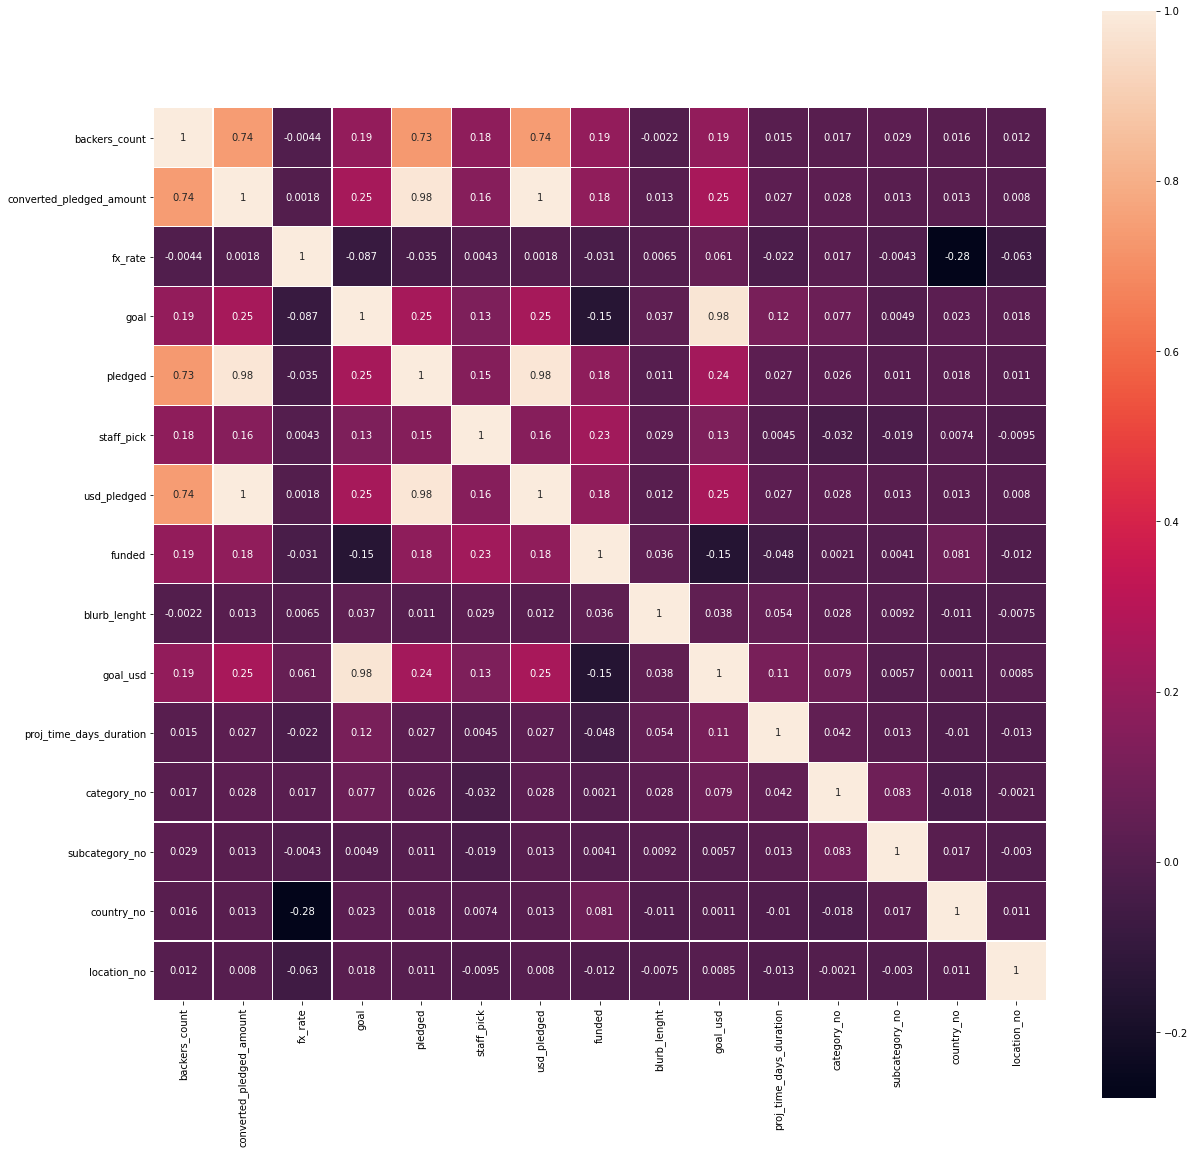

In [23]:
le = LabelEncoder()
dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])
dataFrame['location_no'] = le.fit_transform(dataFrame['location'])

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Addition of the second feature named project_time which represents the duration of the project since its creation until its deadline.

<AxesSubplot:>

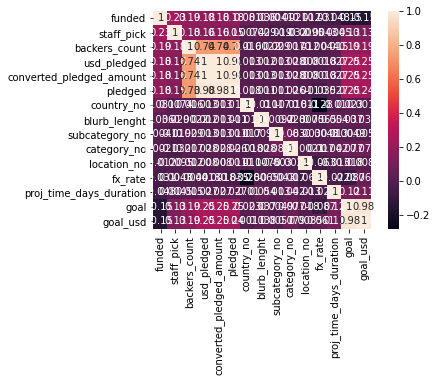

In [24]:
corrmat = dataFrame.corr()
cols = corrmat.nlargest(15, 'funded').index
sns.heatmap(corrmat.loc[cols, cols], square= True, annot = True)

<AxesSubplot:>

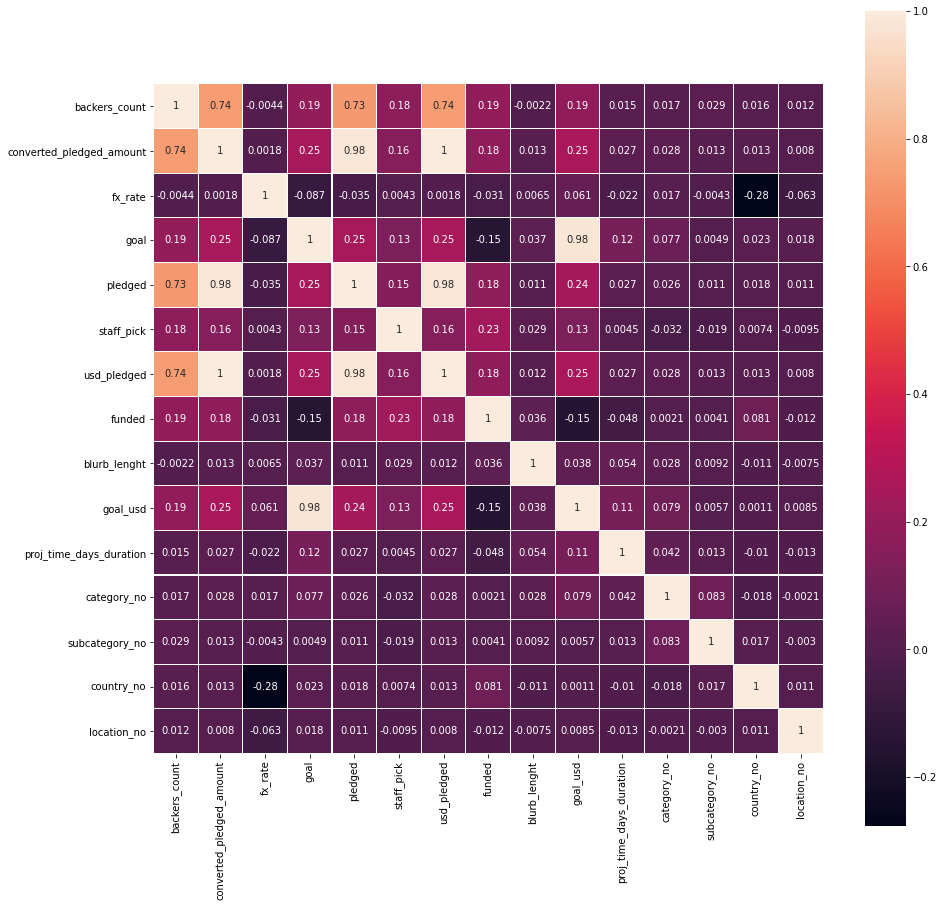

In [25]:
dataFrame.head(3)

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Logistic Regression Model

In [293]:
df = pd.DataFrame(dataFrame)
le = LabelEncoder()

dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])

dataFrame['log_goal'] = np.log(dataFrame.goal)
x = dataFrame[['goal','category_no','subcategory_no','country_no','project_time']]  # Known features
y = dataFrame.funded

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

modelTest = LogisticRegression()
modelTest.fit(x,y)
print (modelTest.score(x,y))

KeyError: "['project_time'] not in index"

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

X = dataFrame[['goal', 'category_no', 'subcategory_no', 'staff_pick','blurb_lenght','proj_time_days_duration']]  # Known features
y = dataFrame['funded']  # To be predicted

# Split the dataset into a training- and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=10)

# Train the model with the training features
clf.fit(X_train,y_train)

y_pred = clf.predict(X_val)

# Correctness of the classifier (slightly different everytime)
print('Acuuracy score is {}%'.format(metrics.accuracy_score(y_val, y_pred) * 100))
print("Precision score:", metrics.precision_score(y_test, y_pred, average='binary'))
print("Recall score:", metrics.recall_score(y_test, y_pred, average='binary'))

dataFrame['FundedPre'] = clf.predict(X)
dataFrame.funded.describe()

Acuuracy score is 74.68455609477591%
Precision score: 0.6197849063600964
Recall score: 0.6149954001839927


count     87572
unique        2
top        True
freq      54498
Name: funded, dtype: object

In [30]:
from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
n_estimators = [10,20,40,60,80,100,150,200,250]
# empty list that will hold cv scores
cv_scores = []
for k in n_estimators:
    clf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = n_estimators[optimal_k_index]
print(optimal_k)

100


We found out using cross validation that 100 is the best number of estimators

In [32]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Correctness of the classifier (slightly different everytime)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print (clf.score(X_test,y_test))

dataFrame['FundedPre'] = clf.predict(X)
dataFrame.FundedPre.describe()

Accuracy: 0.7655723665429631
0.7655723665429631


count     87572
unique        2
top        True
freq      54891
Name: FundedPre, dtype: object

Code to split set in train,val,test set 60,20,20

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size= 0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

KNeighbours

In [149]:
from sklearn.neighbors import KNeighborsClassifier

X = dataFrame[['goal_usd', 'category_no', 'subcategory_no', 'staff_pick','country_no','blurb_lenght','proj_time_days_duration']]  # Known features
y = dataFrame['funded']  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)
print('Acuuracy score is {}'.format(metrics.accuracy_score(y_test, y_pred)))

from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,60) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



Acuuracy score is 0.6368826719954325



KeyboardInterrupt



We find the best n_neighbour to use

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = dataFrame[['goal_usd', 'category', 'subcategory', 'staff_pick','country','blurb_lenght','proj_time_days_duration']]  # Known features
y = dataFrame['funded']  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Acuuracy score is {}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

Open test data file

In [305]:
dataFrameTest = pd.read_csv('KS_test_data.csv', delimiter=';')

In [306]:
dataFrameTest = dataFrameTest.dropna(how='any',axis=0)

Training data set addition of new columns 

In [308]:
le = LabelEncoder()
dataFrameTest['deadline']= pd.to_datetime(dataFrameTest['deadline'],origin='unix',unit='s')
dataFrameTest['created_at']= pd.to_datetime(dataFrameTest['created_at'],origin='unix',unit='s')
dataFrameTest['launched_at']= pd.to_datetime(dataFrameTest['launched_at'],origin='unix',unit='s')

dataFrameTest['category'] = le.fit_transform(dataFrameTest['category'])
dataFrameTest['subcategory_no'] = le.fit_transform(dataFrameTest['subcategory'])
dataFrameTest['proj_time_days_duration'] = (dataFrameTest.deadline - dataFrameTest.launched_at)
dataFrameTest['proj_time_days_duration'] = dataFrameTest['proj_time_days_duration'].dt.days
dataFrameTest['blurb_lenght'] = dataFrameTest['blurb'].str.len()
dataFrameTest['goal_usd'] = (dataFrameTest['goal'] * dataFrameTest['fx_rate'])

In [267]:
dataFrameTest.head(10)

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,subcategory,project_url,reward_url,subcategory_no,proj_time_days_duration,blurb_lenght,goal_usd
0,KS_100000,We are looking to bring a Visiting Sculptor fr...,0,US,2012-03-02 22:29:22,USD,2012-04-20 22:06:38,1.0,3900.0,2012-03-28 22:06:38,Martin Luther King Jr. Sculpture on Campus!,False,"Bakersfield, CA",art,https://www.kickstarter.com/projects/153685020...,https://www.kickstarter.com/projects/153685020...,10,23,135.0,3900.0
1,KS_100001,Surrealistic oil paintings capturing the metam...,0,US,2012-03-24 14:16:07,USD,2012-04-17 03:59:00,1.0,750.0,2012-03-28 23:01:19,EMERGENCE: Surreal Oil Paintings by J.J. Long,False,"Lowell, MA",painting,https://www.kickstarter.com/projects/203971390...,https://www.kickstarter.com/projects/203971390...,95,19,90.0,750.0
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 a...,0,US,2012-03-23 04:23:27,USD,2012-04-03 02:57:23,1.0,1000.0,2012-03-29 02:57:23,P.M.A.F.T.W.,False,"Portland, OR",painting,https://www.kickstarter.com/projects/144231475...,https://www.kickstarter.com/projects/144231475...,95,5,61.0,1000.0
3,KS_100003,A series of images about the art/artist and lo...,0,US,2012-01-26 00:41:49,USD,2012-05-28 18:56:38,1.0,15000.0,2012-03-29 18:56:38,MetropoLOVE - Book project to be completed fro...,False,"Imlay, NV",public art,https://www.kickstarter.com/projects/199636585...,https://www.kickstarter.com/projects/199636585...,113,60,134.0,15000.0
4,KS_100004,Become a part of the first crowd-funded commun...,0,US,2012-03-25 19:58:48,USD,2012-04-16 20:00:00,1.0,4200.0,2012-03-29 19:33:06,DS106: The Open Online Community of Digital St...,True,"Fredericksburg, VA",digital art,https://www.kickstarter.com/projects/jimgroom/...,https://www.kickstarter.com/projects/jimgroom/...,36,18,100.0,4200.0
5,KS_100005,I will be creating an artist book edition at M...,0,US,2012-02-24 00:16:30,USD,2012-04-30 04:00:00,1.0,2500.0,2012-03-28 19:06:33,"Everything You Hear (working title), an artist...",False,"Minneapolis, MN",mixed media,https://www.kickstarter.com/projects/938956896...,https://www.kickstarter.com/projects/938956896...,86,32,122.0,2500.0
6,KS_100006,Inside these pages are the building blocks of ...,0,US,2011-11-22 15:46:12,USD,2012-04-27 20:40:47,1.0,9000.0,2012-03-28 20:40:47,"Hot Rod Illustration #101, Drawing AUTOS WITH ...",False,"Sharon, VT",illustration,https://www.kickstarter.com/projects/832720854...,https://www.kickstarter.com/projects/832720854...,69,30,125.0,9000.0
7,KS_100007,Bobo's Bayou will be making its debut at the M...,0,US,2012-02-16 07:30:45,USD,2012-03-17 08:12:33,1.0,3500.0,2012-02-16 09:12:33,Bobo's Bayou,False,"Missoula, MT",public art,https://www.kickstarter.com/projects/338398024...,https://www.kickstarter.com/projects/338398024...,113,29,113.0,3500.0
8,KS_100008,Larger metal creatures arise in this undergrad...,0,US,2012-02-14 13:39:22,USD,2012-03-26 02:00:00,1.0,700.0,2012-02-16 22:27:15,Resurrection: The Spirits in Metal,True,"Bridgewater, VA",sculpture,https://www.kickstarter.com/projects/161524146...,https://www.kickstarter.com/projects/161524146...,127,38,134.0,700.0
9,KS_100009,This is a Salsa Concept Video. I am choreogra...,0,US,2012-02-17 18:51:39,USD,2012-03-06 01:00:00,1.0,1500.0,2012-02-18 01:54:47,Night Before Salsa Concept Video,False,"Hollywood, Los Angeles, CA",performance art,https://www.kickstarter.com/projects/danelladu...,https://www.kickstarter.com/projects/danelladu...,97,16,130.0,1500.0


In [309]:
x=dataFrameTest[['goal', 'category', 'subcategory_no', 'staff_pick','blurb_lenght','proj_time_days_duration']]
dataFrameTest['funded'] = clf.predict(x)
dataFrameTest.funded.describe()

count     78060
unique        2
top        True
freq      47382
Name: funded, dtype: object

Create predictions.tsv file and save project_id and funded prediction 

<!-- We maybe removed too much data as now the countis 73906 out of 100K -->

In [310]:
dataFrameTest.to_csv('predictions.tsv', sep='\t', columns=['project_id','funded'], header=False, index=False)